# Equações diferenciais com atrasos
Muito fenômenos naturais apresentam atrasos na relação entre causa e efeito. Se formos estritos preceberemos que poucas relações de causa e efeito em biologia podem ser consideradas instantâneas, Por exemplo: um predador leva tempo para digerir sua presa e convertê-la em novos predadores. Sob esta ótica, os modelos baseados em EDOs que vimos até agora, são meras aproximações às dinâmicas reais. 

Técnicamente falando, os modelos EDO, partem do princípio que apena o conhecimento do presente e sua derivada é suficiente para determinar o estado imediatamente futuro do sistema. Equações diferencias com atrasos, incluem a dependência de outros pontos na história do sistema para a determinação dos estados futuros. Desta maneira os sistema pode ser escrito da seguinte forma:
$$\frac{dx}{dt} = F(t, x(t), x(t-\tau))$$

onde $\tau$ é o parâmetro de atraso.

## Equação Logística com atraso discreto
Como nosso primeiro exemplo. vamos examinar a equação de Hutchinson (1948):
$$\frac{dx(t)}{dt}=r x(t)\left[1-\frac{x(t-\tau)}{K}\right]$$

Modelos com atraso são usados muito menos frequentemente, devido à dificuldade na sua solução analítica. Felizmente dispomos de uma [biblioteca](https://github.com/Zulko/ddeint) em Python para sua solução numérica.

In [1]:
%display typeset
import warnings
warnings.filterwarnings('always')

In [2]:
from ddeint import ddeint
import numpy as np

Wright demonstrou em 1955, que se $r\tau<\frac{37}{24}$ e $x(0)>0$, $x(t) \rightarrow K$ quando $t\rightarrow \infty$. Mas se $r\tau > \frac{pi}{2}$, então a equação logística com atraso, apresenta uma solução periódica (ciclo limite), que oscila em torno de K.

Para resolver uma equação diferencial com atrasos, precisamos definir uma função de história que retorna o comportamento do sistema no intervalo $[-\tau,0]$, assumindo que o período da dinâmica em que estamos interessado começa em $t=0$.

In [16]:
def logdelay(y,t,*pars):
    x=y(t)
    r,K,tau = pars
    xd = y(t-tau)
    return np.array([
        r*x*(1-(xd/K))
    ])
@interact
def plot_logistic(r=slider(1,3,0.1,pi/2),tau=slider(0,2,.2,1)):
    g = lambda t: 1 # valores de x(t) quando x pertence ao intervalo [-tau,0]
    tsteps = np.linspace(0,50,1000)
    show("r tau > pi/2? ", (r*tau)>(pi/2).n())
    K = 1000
    
    res=ddeint(logdelay,g, tsteps, (r,K,tau))
    P = list_plot(list(zip(tsteps,np.array(res))), legend_label='$x(t)$')
    l = plot(1000, (x,0,50), legend_label='K', color='green', linestyle=':')
    D = list_plot(list(zip(res[2:],res[:-2])), axes_labels=['$x(t)$','$x(t-2)$'])
#     show(D)
    show(graphics_array([(P+l,),(D,)]), figsize=[8,10])

Interactive function <function plot_logistic at 0x7fbb448cf488> with 2 widgets
  r: TransformFloatSlider(value…

## Análise de Estabilidade Linear

Os equilíbrios (x*) de um sistema dinâmico com atraso, de forma similar a EDOs, são pontos que satisfazem a seguinte condição: 
$$f(x^*)=0$$

Para a análise da estabilidade dos equilíbrios, uma diferença é que em DDEs perturbações do sistema na vizinhaça destes equilíbrio levam a deslocamentos que são funções do tempo $\delta x(t)$. Seja $x_{\tau}=x(t-\tau)$, 

## Modelo predador-presa

Considere o seguinte modelo de Lotka-Volterra com atrasos:

\begin{align}
\frac{dx}{dt} &= x(r_1-a_{11}x_{\tau}-a_{12}y_{\tau}) \\
\frac{dy}{dt} &= y (-r_2 +a_{21}x_{\tau}-a_{22}y_{\tau})
\end{align}
onde $r_1$, $r_2$, $a_{11}$, $a_{12}$, $a_{21}$ e $a_{22}$ são constantes e o atraso $\tau \geq 0$, corresponte ao período de gestação do predador.

In [19]:
def pred_presa(S,t,*pars):
    x,y = S(t)
    r1,r2,a11,a12,a21,a22,tau = pars
    xd,yd = S(t-tau)
    return np.array([
        x*(r1-a11*xd-a12*yd),
        y*(-r2 +a21*xd -a22*yd)
    ])
    


@interact
def show_sol(tau=slider(0,2.5,0.5,1)):
    g = lambda t: np.array([1,1])
    r1=1.1
    r2=1
    a11=1
    a12=1
    a21=2
    a22=1
    tsteps = np.linspace(0,100,1000)
    res = ddeint(pred_presa, g, tsteps,(r1,r2,a11,a12,a21,a22,tau))
    P = list_plot(list(zip(res[:,0],res[:,1])), plotjoined=True, axes_labels=['$x(t)$','$y(t)$'])
    show(P);

Interactive function <function show_sol at 0x7fbb44b66378> with 1 widget
  tau: TransformFloatSlider(value=1.0…

## Hematopoiesis
Considere o modelo de Mackey-Glass de uma dimensão. 
$$\frac{dx(t)}{dt}=\frac{\beta x(t-\tau)}{1+x(t-\tau)^n}-\delta x(t)$$
onde $x(t)$ é o número de células sanguíneas no tempo $t$, $\tau$ é um atraso constante e $n$ uma constante. O primeiro termo da equação representa a produção atrasada de células e $delta$ a taxa de mortalidade das células.

In [23]:
import pylab as plt

In [64]:
def hematopoiesis(S,t,*pars):
    x = S(t)
    beta, n,delta, tau = pars
    xd = S(t-tau)
    return np.array([
        (beta*xd)/(1+xd**n)-delta*x
    ])

@interact
def show_sol(beta=2,n=10, tau=2,delta=0.7):
    g = lambda t: 0.5
    tsteps = np.linspace(0,512,4096)
    res = ddeint(hematopoiesis, g, tsteps,(beta,n,delta,tau))
    res = res[200:]
    P = list_plot(list(zip(res[tau:],res[:-tau])), plotjoined=True, axes_labels=['$x(t)$',r'$x_{\tau}$'])
    Q = list_plot(list(zip(tsteps[-256:],res[-256:])), plotjoined=True, axes_labels=['$t$',r'$x(t)$'])
    
    show(graphics_array([[P],[Q]]), figsize=[8,10]);

Interactive function <function show_sol at 0x7fbb3df9d7b8> with 4 widgets
  beta: IntSlider(value=2, descripti…

In [66]:
g = lambda t: 0.5
tsteps = np.linspace(0,2048,2048)
res = ddeint(hematopoiesis, g, tsteps,(2,10,0.7,2))

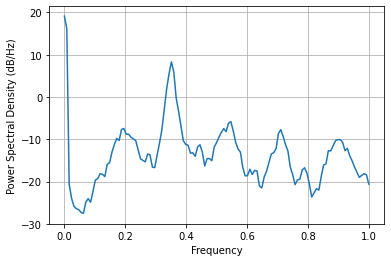

In [67]:
plt.psd(res, noverlap=128);

In [ ]:
def drawbif(l,u):
    g = lambda t: 0.5
    tsteps = np.linspace(0,256,768)
    
    pts = []
    for delta in np.linspace(l,u,50):
        res = ddeint(hematopoiesis, g, tsteps,(2,10,delta,2))
        res = np.array([res[0]]+[i[0] for i in res[1:]])
        dres = np.diff(res)
        pts += [(delta,x) for i,x in enumerate(res[-128:]) if dres[i] <=1e-15]
    
    show(points(pts),axes_labels=[r'$\delta$','$x(t)$'],gridlines=True, figsize=[10,8])
    



drawbif(0,1.8)